<h3> Author:  <b> Rhondene Wint </b>  </h3>

## Workflow Coalescent Event without Mutation In a Diploid Population 
<p>
** Assumptions**   
- <i>Infinite allele model</i> : the mutation produces a new allele not seen in any other individual in the present genealogy   
- <i>Infinite sites model</i> : each allele is infinitely long and only one mutation occurs at each site
- <i> Neutral Mutations </i> : neutral mutations do no affect reproductive fitness
</p> 


- N = population size (int), diploid is 2N
- n = number of genes in sample 
- n_coalesce : number of genese to coalese at each event
- T=  expected or mean waiting time 
- t : coalescent waiting time,  randomly generated from exp( 1/lam)


<p>

1. ** go from n alleles to n-1 alleles to n-2 alleles....until n**     
  
2.  **To compute Coalescent waitng time T(i)  at time t for 2 inds to coalesce, **    
lam  = 4N/ choose (n_genes, n_coalesce)  
mean waiting time Ti =  1/lam      
random waiting time P(t) ~ exp( 1/lam)      
**Compute probability of 2 alleles coalescing at generation**        
coal_event =  lambda*exp(-lambda*t)    
3. **Average Time to the most common recent ancestor for all n genes in each tree/simulation**    
    Mean waiting time = Exp(1/lam)      
  TMRCA = all Sum(Ti)  ##time for all n genes to eventually coalesce   

 <img src="coal_tree.JPG" width="400", height ="400"> 
</p> 
 
 ## Finding the Number of  Mutations at each Branch 
 
 <img src="mut_coal.JPG" width="300", height ="400"> 
 

- Mutations occurs a Poisson process with rate = theta/2. Mutations occur on a branch *l* is Poisson dist with  mean (thetaxl/2).

- Mutation events are poisson distributed, depends on branch lenght l. Branch lenght is the interval between Coalescence events.

branch length = mean waiting time x i lineages at that time, Ti  
length =  Sum(  iT(i) )    
total length of geneology = Sum(iT(i)), i=2 to n     

Expected Number of Mutation, S, (segregating sites or polymorphic sites) for that branch length :     
E[S]  = theta/2 x *lenght  
E[S] = (theta/2) x sum(i * 4/i(i-1), i=2 to n   

1. Simulate coalescence without mutations
2. For each branch of lenght, l, draw the number of mutations from a Poisson(theta/2 x length)   
   l = i(Ti)?   
   prob of mutation =theta/(theta+ k-1)   
3. For each branch, the times of the number of mutations are chosen uniformly on the branch



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string
from scipy.special import comb as choose
import matplotlib
import random
% matplotlib notebook
matplotlib.get_backend()

'nbAgg'

In [2]:
n_genes= list(string.ascii_lowercase[:10])   #start off with sample size of 10 genes
n_genes

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [3]:
T_gen = dict()              #caches coalescent waitign time for each generation
t = []                       #caches random time, don't know why I'd need to but just in case
events = dict()              #caches probability of coalescent event
branch = dict()              #caches number of mutation along each branch
TMRCA = []                   
N = 10000                    #effective population size 
u = 10**-7                     #mutation rate
theta = 4*N*u                #diploid locus
i = 0                         # number of lineages that share that interval 
n_coalesce = 2                #number of genes from sample to coalesce at the each preceding generation

while len(n_genes) >1:  #repeat until n=1, that the most common recent answer
    k = len(n_genes)
    """randomly pick two alleles from the sample without replacement"""
    pair = random.sample(n_genes,n_coalesce)
    parent = pair[0]+pair[1] 
    
    """compute coalesence waiting time for k lineages  """
    
    lam =  choose(k,2)/ (4*N )                 # mean watinting time, scaled by the diploid population 4N
    Tk =  1/lam                                
    coal_t = np.random.exponential(lam)        #coal_t is exponentially distributed with mean lam
    T_gen['t'+'-'+str(i+1)] = Tk      
    t.append(coal_t)
    
    """compute probability of coalesence event at time coal_t"""
    
    coal = lam* np.exp(-lam*coal_t)
    events['t'+'-'+str(i)] = coal
    
    """delete the descendants and update with parent   """
    n_genes.remove(pair[0])
    n_genes.remove(pair[1])
    n_genes.append(parent) 
    
    """Compute the Number of Mutations at each branch length, l"""
    l = i*sum(T_gen.values())        #will be zero at i=0 but I don't want another for loop, not fucking worth the extra code
    E_S = (theta/2)*l               #expected number of mutations
    mut = np.random.poisson(E_S)    #draw from poisson with mean E_S 
    branch['T'+str(i)] = mut        #store the number of mutations along each branck length
    
    """How long until TMRCA of all the n_genes """
    TMRCA.append(np.asarray(t).sum())
    i+=1

In [4]:
T_gen

{'t-1': 888.8888888888889,
 't-2': 1111.111111111111,
 't-3': 1428.5714285714287,
 't-4': 1904.7619047619048,
 't-5': 2666.6666666666665,
 't-6': 4000.0,
 't-7': 6666.666666666667,
 't-8': 13333.333333333334,
 't-9': 40000.0}

<IPython.core.display.Javascript object>


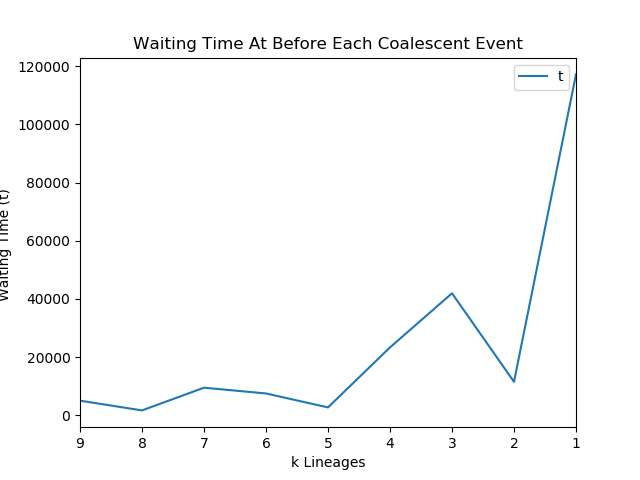

In [11]:
t=np.asarray(t) 
time = np.asarray(range(len(T_gen)) ) *-1 
time   ## array([ 0, -1, -2, -3, -4, -5, -6, -7, -8]) 

_ =zip( reversed(-time+1),t)
x,y = zip (*_)
import pandas as pd
df= pd.DataFrame({'k':x,
                 't':y})
df['t'] = 1/df['t']

df.plot('k', 't')
plt.title('Waiting Time At Before Each Coalescent Event')
plt.xlabel ('k Lineages')
plt.ylabel('Waiting Time (t) ')
plt.show()

# PLOTTING COALESCENCE

<IPython.core.display.Javascript object>


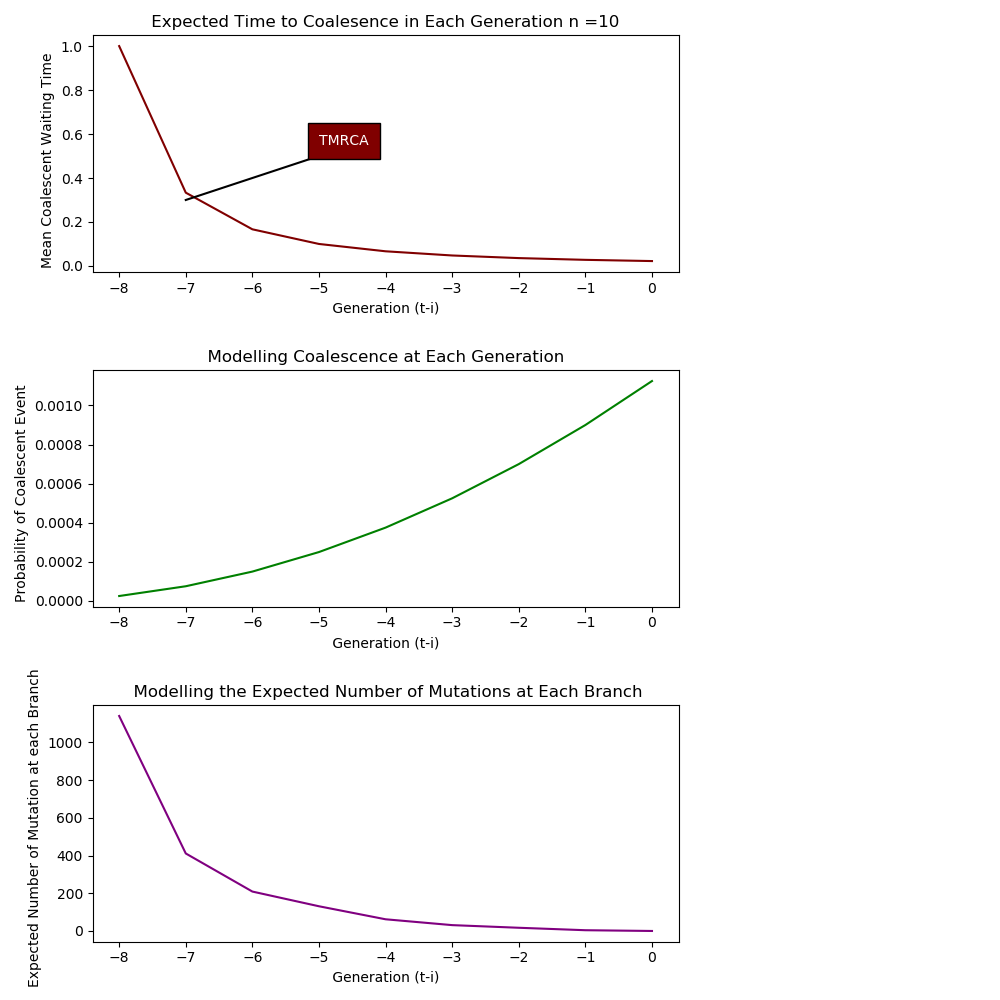

In [14]:
plt.figure(figsize=(10,10))

ax0 = plt.subplot2grid((9,3), (0,0), rowspan=3, colspan=2)   
y =np.asarray(list((T_gen.values())))

ax0.plot( time, y/(4*N), color='maroon') 
ax0.plot([-7, -5],[0.3, 0.5], 'k-')
ax0.set_title(' Expected Time to Coalesence in Each Generation n =10 ')
ax0.set_ylabel('Mean Coalescent Waiting Time   ')
ax0.set_xlabel(' Generation (t-i) ')

ax0.text(-5,0.6 , 'TMRCA', ha='left', va='top', color='white',bbox={'facecolor':'maroon', 'alpha':1.0, 'pad':8})
ax1 = plt.subplot2grid((9,3), (3,0), rowspan=3, colspan=2)    

y = np.asarray(list(events.values()))

ax1.plot( time, y, color='Green' )
ax1.set_title('  Modelling Coalescence at Each Generation  ')
ax1.set_ylabel('Probability of Coalescent Event  ')
ax1.set_xlabel(' Generation (t-i) ')

ax2 = plt.subplot2grid((9,3), (6,0), rowspan=3, colspan=2)    
y = np.asarray(list(branch.values()))

ax2.plot( time, y, color='purple') 
ax2.set_title('  Modelling the Expected Number of Mutations at Each Branch ')
ax2.set_ylabel('Expected Number of Mutation at each Branch  ')
ax2.set_xlabel(' Generation (t-i) ')

plt.tight_layout()
plt.show()

##  Analysis/Comments
 
- The mean waiting time increases as the number of lineages decrease
- The mean waiting time follows a smoother exponential distribution compared to random sampled
- The probability of coalescent events decrease exponentially the farther backwards in time. This is due to a decrease in number of ancestors for  lineages to choose from in each preceding generation.
- The longer the branch length, i.e, the longer the time time before a coalescent event then there is greater likelihood of mutations along each branch. 